# Work Flow
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Read-in Data

#### Training Data

In [2]:
housing = pd.read_csv('datasets/train.csv')
pd.set_option('display.max_columns', None)
housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Test Data

In [3]:
test = pd.read_csv('datasets/test.csv')
pd.set_option('display.max_columns', None)
test.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD


## Data Cleaning

In order to ensure that all cleaning steps conducted on the training data are also conducted on the testing data, both datasets will be cleaned simultaneously.

### Check Shape

In [4]:
housing.shape

(2051, 81)

In [5]:
test.shape # One less column because missing sales price (target)

(878, 80)

In [6]:
# Calculate max number of features for training 
np.sqrt(housing.shape[0])

45.28796749689701

### Cleaning Functions

In [7]:
def plot_na(df):
    plt.figure(figsize=(22,6))
    df.isna().sum().plot(kind='bar')
    plt.tight_layout();

In [8]:
def show_na_sum(df, column):
    return df[column].isna().sum()

In [9]:
def fix_na(df, column, value):
    df[column] = df[column].fillna(value)

In [10]:
def change_dtype(df, column, map_fxn):
    df[column] = df[column].map(map_fxn)

### Check for Null/Missing Values

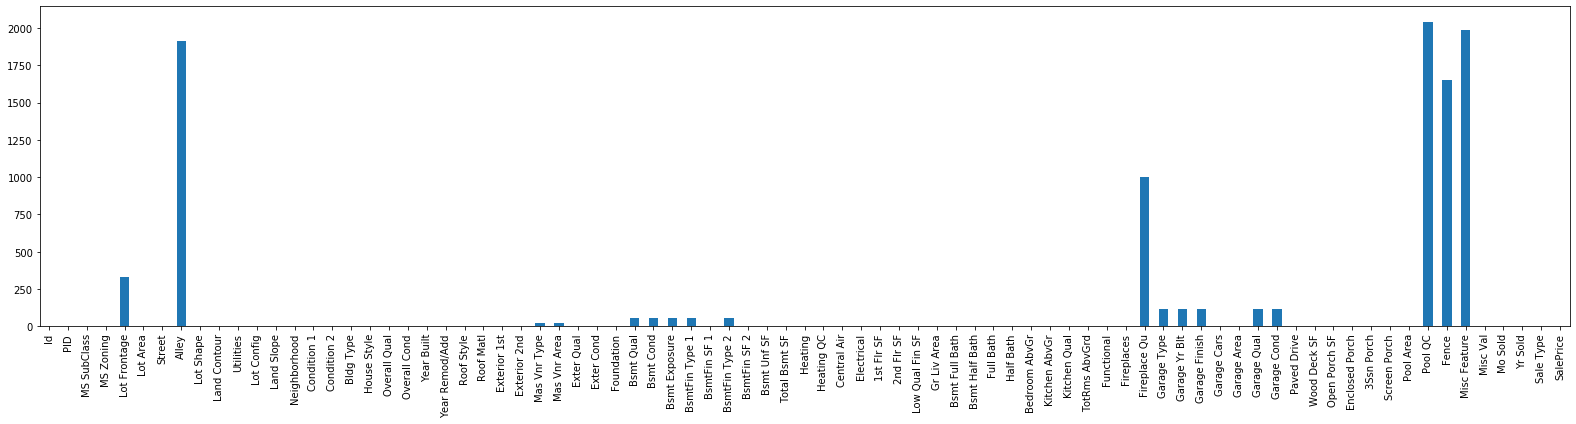

In [11]:
plot_na(housing)

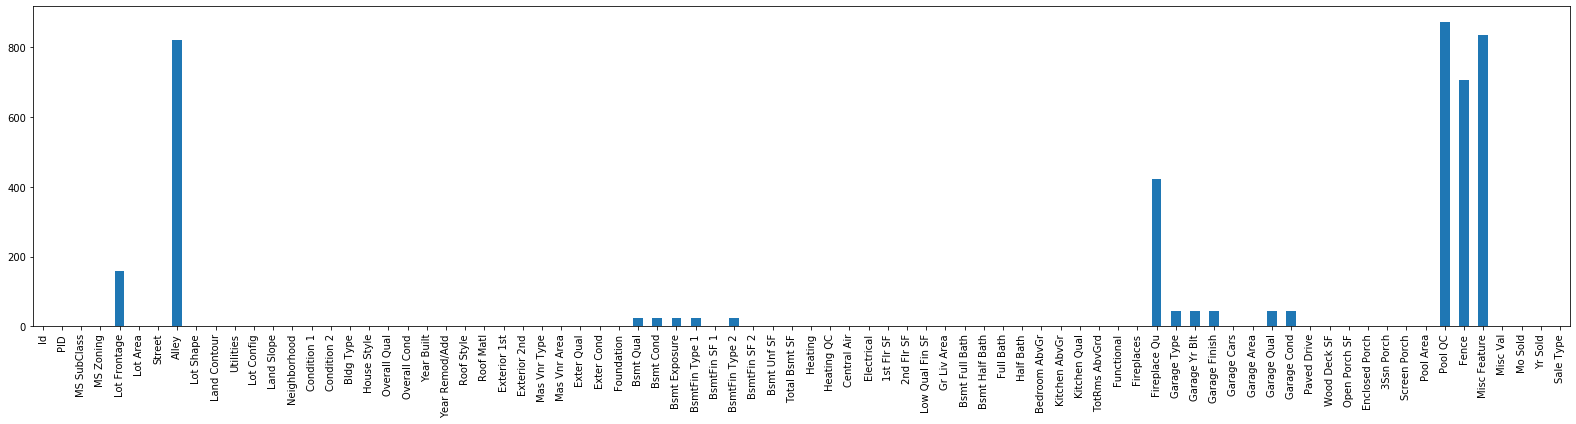

In [12]:
plot_na(test)

The pattern of missing/null values appears the same for the training and testing datasets. There are visibly missing values for Lot Frontage, Alley, Mas Vnr Type, Mas Vnr Area, Bsmt Qual, Bsmt Cond, Basmt Exposure, BasmtFin Type 1, BsmtFin Type 2, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Fin, Garage Qual, Garage Cond, Pool QC, Fence, Misc Feature.

#### Lot Frontage

In [13]:
show_na_sum(housing, 'Lot Frontage')

330

In [14]:
housing[housing['Lot Frontage'].isna()]['MS Zoning'].value_counts()

RL    289
RM     25
FV     13
RH      3
Name: MS Zoning, dtype: int64

After exploring different features for this missing data (e.g. neighborhood, building class, zoning, lot area), it seemed like data was missing at random. Therefore null values will be filled with the mean.

In [15]:
# Clean Train Data
fix_na(housing, 'Lot Frontage', housing['Lot Frontage'].mean())

In [16]:
# Clean Test Data
fix_na(test, 'Lot Frontage', test['Lot Frontage'].mean())

#### Alley

In [17]:
show_na_sum(housing, 'Alley')

1911

In [18]:
housing['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

According to the data dictionary, 'Alley' should have three levels: Grvl, Pave, and NA. The NA (no access) variable has been replaced by NaN. The NaN will be filled with 'NA'.

In [19]:
# Fix Train Data
fix_na(housing, 'Alley', 'NA')

In [20]:
# Fix Test Data
fix_na(test, 'Alley', 'NA')

#### Mas Vnr Type

In [21]:
show_na_sum(housing, 'Mas Vnr Type')

22

In [22]:
housing['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Because values cannot be imputed for categorical data and the rows cannot be dropped, these values will be filled in with None.

In [23]:
# Fix Train Data
fix_na(housing, 'Mas Vnr Type', 'None')

In [24]:
# Fix Test Data
fix_na(test, 'Mas Vnr Type', 'None')

#### Mas Vnr Area

In [25]:
show_na_sum(housing, 'Mas Vnr Area')

22

In [26]:
housing[housing['Mas Vnr Type'] == 'None']['Mas Vnr Area']

2       0.0
3       0.0
4       0.0
5       0.0
8       0.0
       ... 
2046    0.0
2047    0.0
2048    0.0
2049    0.0
2050    0.0
Name: Mas Vnr Area, Length: 1240, dtype: float64

In [27]:
# Fix Train Data
fix_na(housing, 'Mas Vnr Area', 0)

In [28]:
# Fix Test Data
fix_na(test, 'Mas Vnr Area', 0)

#### Bsmt Qual

In [29]:
show_na_sum(housing, 'Bsmt Qual')

55

In [30]:
housing['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

From the data dictionary, there should be a category 'NA' that means that a house has no basement. It was likely read-in as missing data by pandas. Missing values will be replaced with 'NA'.

In [31]:
# Fix Train Data
fix_na(housing, 'Bsmt Qual', 'NA')

In [32]:
# Fix Test Data
fix_na(test, 'Bsmt Qual', 'NA')

#### Bsmt Cond

In [33]:
show_na_sum(housing, 'Bsmt Cond')

55

In [34]:
housing['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [35]:
# Fix Train Data
fix_na(housing, 'Bsmt Cond', 'NA')

In [36]:
# Fix Test Data
fix_na(test, 'Bsmt Cond', 'NA')

#### Bsmt Exposure

In [37]:
show_na_sum(housing, 'Bsmt Exposure')

58

In [38]:
housing['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

There are only 55 houses listed as NA but 58 missing values here. For now, I will just fill these values in with 'NA'. 

In [39]:
# Fix Train Data
fix_na(housing, 'Bsmt Exposure', 'NA')

In [40]:
# Fix Test Data
fix_na(test, 'Bsmt Exposure', 'NA')

#### BsmtFin Type 1

In [41]:
show_na_sum(housing, 'BsmtFin Type 1')

55

In [42]:
housing['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [43]:
# Fix Train Data
fix_na(housing, 'BsmtFin Type 1', 'NA')

In [44]:
# Fix Test Data
fix_na(test, 'BsmtFin Type 1', 'NA')

#### BsmtFin Type 2

In [45]:
show_na_sum(housing, 'BsmtFin Type 2')

56

In [46]:
housing['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [47]:
# Fix Train Data
fix_na(housing, 'BsmtFin Type 2', 'NA')

In [48]:
# Fix Test Data
fix_na(test, 'BsmtFin Type 2', 'NA')

#### Fireplace Qu

In [49]:
show_na_sum(housing, 'Fireplace Qu')

1000

In [50]:
housing[housing['Fireplaces']==0]['Fireplace Qu'].count()

0

Because there are 1000 houses listed as having 0 fireplaces and NaN for Fireplace Qu, I think that I can safely assume that the missing values should be 'NA'.

In [51]:
# Fix Train Data
fix_na(housing, 'Fireplace Qu', 'NA')

In [52]:
# Fix Test Data
fix_na(test, 'Fireplace Qu', 'NA')

#### Garage Type

In [53]:
show_na_sum(housing, 'Garage Type')

113

In [54]:
housing[housing['Garage Area']==0]['Id'].count()

113

In [55]:
housing['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [56]:
# Fix Train Data
fix_na(housing, 'Garage Type', 'NA')

In [57]:
# Fix Test Data
fix_na(test, 'Garage Type', 'NA')

#### Garage Yr Built

In [58]:
show_na_sum(housing, 'Garage Yr Blt')

114

In [59]:
mask1 = housing['Garage Area'] != 0
mask2 = housing['Garage Yr Blt'].isna()

housing[mask1 & mask2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


There is one house listed as having a detached garage tht is missing data for all other garage qualities. For now, these qualities will be listed as 'NA', but I might revisit it later.

In [60]:
# Fix Train Data
fix_na(housing, 'Garage Yr Blt', 'NA')

In [61]:
# Fix Test Data
fix_na(test, 'Garage Yr Blt', 'NA')

#### Garage Finish

In [62]:
show_na_sum(housing, 'Garage Finish')

114

In [63]:
# Fix Train Data
fix_na(housing, 'Garage Finish', 'NA')

In [64]:
# Fix Test Data
fix_na(test, 'Garage Finish', 'NA')

#### Garage Qual

In [65]:
show_na_sum(housing, 'Garage Qual')

114

In [66]:
# Fix Train Data
fix_na(housing, 'Garage Qual', 'NA')

In [67]:
# Fix Test Data
fix_na(test, 'Garage Qual', 'NA')

#### Garage Cond

In [68]:
show_na_sum(housing, 'Garage Cond')

114

In [69]:
# Fix Train Data
fix_na(housing, 'Garage Cond', 'NA')

In [70]:
# Fix Test Data
fix_na(test, 'Garage Cond', 'NA')

#### Pool QC

In [71]:
show_na_sum(housing, 'Pool QC')

2042

In [72]:
housing['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [73]:
housing[housing['Pool Area'] == 0]['Id'].count()

2042

In [74]:
housing[housing['Pool Area'] == 0].count()['Id']/housing['Pool Area'].count()

0.9956118966357874

Almost 99.6% of the houses in the train data do not have pools. These missing values will be coded as 'NA' (No Pool). 

In [75]:
# Fix Train Data
fix_na(housing, 'Pool QC', 'NA')

In [76]:
# Fix Test Data
fix_na(test, 'Pool QC', 'NA')

#### Fence

In [77]:
show_na_sum(housing, 'Fence')

1651

In [78]:
housing['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [79]:
# Fix Train Data
fix_na(housing, 'Fence', 'NA')

In [80]:
# Fix Test Data
fix_na(test, 'Fence', 'NA')

#### Misc Feature

In [81]:
show_na_sum(housing, 'Misc Feature')

1986

In [82]:
housing['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [83]:
# Fix Train Data
fix_na(housing, 'Misc Feature', 'NA')

In [84]:
# Fix Test Data
fix_na(test, 'Misc Feature', 'NA')

#### Overall Check

In [85]:
def check_for_nulls(df):
    missing_list = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            missing_list.append(column)

    return missing_list

In [86]:
check_for_nulls(housing)

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [87]:
check_for_nulls(test)

['Electrical']

#### Basmt Fin SF 1

In [88]:
show_na_sum(housing, 'BsmtFin SF 1')

1

In [89]:
housing[housing['BsmtFin SF 1'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [90]:
fix_na(housing, 'BsmtFin SF 1', 0)

In [91]:
show_na_sum(housing, 'BsmtFin SF 1')

0

#### BsmtFin SF 2

In [92]:
show_na_sum(housing, 'BsmtFin SF 2')

1

In [93]:
fix_na(housing, 'BsmtFin SF 2', 0)

#### Bsmt Unf SF

In [94]:
show_na_sum(housing, 'Bsmt Unf SF')

1

In [95]:
fix_na(housing, 'Bsmt Unf SF', 0)

#### Total Bsmt SF

In [96]:
show_na_sum(housing, 'Total Bsmt SF')

1

In [97]:
fix_na(housing, 'Total Bsmt SF', 0)

#### Remaining NaN Values

Because all of the missing values were for the same house, I decided to fill na by row.

In [98]:
housing.loc[1327, :].fillna(0)

Id                   1342
PID             903230120
MS SubClass            20
MS Zoning              RM
Lot Frontage           99
                  ...    
Misc Val                0
Mo Sold                 4
Yr Sold              2008
Sale Type           ConLD
SalePrice           79000
Name: 1327, Length: 81, dtype: object

#### Electrical (Test Data Only)

In [99]:
show_na_sum(test, 'Electrical')

1

In [100]:
test[test['Electrical'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
634,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


In [101]:
test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [102]:
fix_na(test, 'Electrical', 'SBrkr') # Fill with most common; Also standard optiono

#### Overall Check #2

In [103]:
check_for_nulls(housing)

['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

In [104]:
check_for_nulls(test)

[]

#### Bsmt Full Bath

In [105]:
housing[housing['Bsmt Full Bath'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [106]:
fix_na(housing, 'Bsmt Full Bath', 0)

#### Bsmt Half Bath

In [107]:
fix_na(housing, 'Bsmt Half Bath', 0)

#### Garage Cars & Garage Area

In [108]:
show_na_sum(housing, ['Garage Cars', 'Garage Area'])

Garage Cars    1
Garage Area    1
dtype: int64

In [109]:
housing[housing['Garage Cars'].isna()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NA,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [110]:
fix_na(housing, ['Garage Cars', 'Garage Area'], 0)

#### Check for Nulls #3

In [111]:
check_for_nulls(housing)

[]

All null values have been cleaned.

### Check for Data Types

In [112]:
# housing.info()

#### Convert Int to String ('Id', 'PID', MS SubClass)

In [113]:
int_to_string = ['Id', 'PID', 'MS SubClass']

for item in int_to_string:
    change_dtype(housing, item, str)

#### Convert Month Int to Month Name

In [114]:
#housing['Mo Sold'].value_counts()

In [115]:
months = {1: 'January',
         2: 'February',
         3: 'March',
         4: 'April',
         5: 'May',
         6: 'June',
         7: 'July',
         8: 'August',
         9: 'September',
         10: 'October',
         11: 'November',
         12: 'December'}

change_dtype(housing, 'Mo Sold', months)

In [116]:
#housing['Mo Sold'].value_counts()

### Check for Unusual Values

#### Numerical Values

In [117]:
housing.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,2007.775719,181469.701609
std,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129825.000000
50%,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,162500.000000
75%,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,2010.000000,611657.000000


In [118]:
# Investigate any values that seem out of the orinary

housing[housing['SalePrice'] == housing['SalePrice'].min()] # Quality is poor, seems to be okay

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1628,182,902207130,30,RM,68.0,9656,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,832,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,June,2010,WD,12789


#### Categorical Values

In [119]:
#https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical

categorical_vars = housing.select_dtypes(exclude = ['number'])

In [120]:
categorical_vars.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Mo Sold', 'Sale Type'],
      dtype='object')

Identified Concerns:
* Neighborhood: Greens (3), GrnHill (2), and Landmark (1) not listed as possible values in data dictionary.

## Exploratory Data Analysis

### Graphing Functions

In [121]:
def create_scatter(df, x_col, y_col, title, x_label, y_label, marker_size = 4, color='mediumseagreen', plot_size = (10,6), hue = None):
    plt.figure(figsize=plot_size)
    ax = sns.scatterplot(x = x_col, y = y_col, data = df, s=marker_size, color=color, hue = hue)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;
    return ax

In [122]:
def create_hist(feature, num_bins, title, x_label, y_label, color='mediumseagreen', edgecolor='black', plot_size = (10,6)):
    plt.figure(figsize=plot_size)
    feature.hist(bins = num_bins, color=color, edgecolor=edgecolor, grid = False)
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [123]:
def create_bar_xticks(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5, x_tick_labels = None):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    ax.set_xticklabels(x_tick_labels)
    plt.tight_layout;

In [124]:
def create_bar(df, x_col, y_col, title, x_label, y_label, hue=None, color = 'mediumseagreen', plot_size = (10,6), lw = 1.5):
    plt.figure(figsize=plot_size)
    ax = sns.barplot(x = x_col, y = y_col, data = df, hue = hue, color = color, linewidth = lw, edgecolor = 'black')
    plt.title(title, fontdict = {'fontsize': 14})
    plt.xlabel(x_label, fontdict = {'fontsize':13})
    plt.ylabel(y_label, fontdict = {'fontsize':13})
    plt.tight_layout;

In [125]:
def create_count(df, x_col, title, x_label, color = 'mediumseagreen', plot_size = (10,6)):
    plt.figure(figsize = plot_size)
    sns.countplot(x=x_col, data = df, palette = 'viridis')
    plt.title(title, fontdict= {'fontsize':14})
    plt.xlabel(f'Number of {x_label} per Property', fontdict= {'fontsize':12})
    plt.ylabel('Number of Properties', fontdict= {'fontsize':12})

### Heatmap and Correlations for Target

In [126]:
corr_matrix = housing.corr()[['SalePrice']].sort_values('SalePrice')

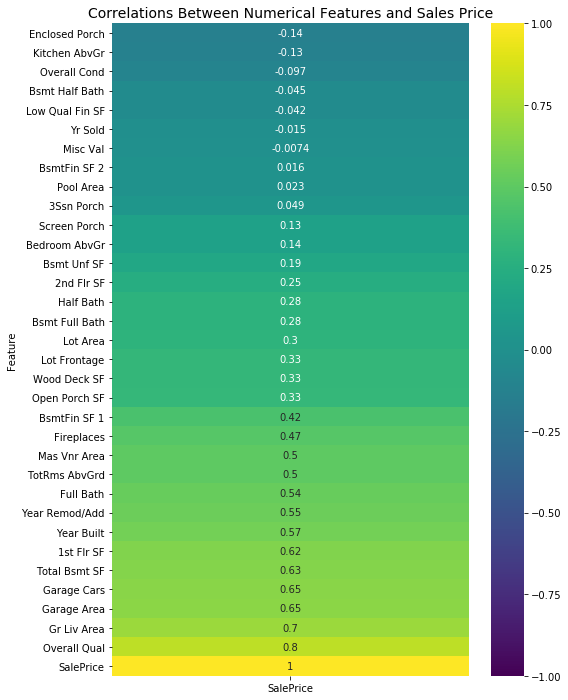

In [127]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sales Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

In [128]:
corr_target = abs(corr_matrix)
salient_num_features = corr_target.loc[corr_target['SalePrice'] > 0.5, :]
salient_num_features

,SalePrice
Mas Vnr Area,0.503579
TotRms AbvGrd,0.504014
Full Bath,0.537969
Year Remod/Add,0.550370
Year Built,0.571849
1st Flr SF,0.618486
Total Bsmt SF,0.629303
Garage Cars,0.647781
Garage Area,0.649897
Gr Liv Area,0.697038


Above, we are able to see that 'Mas Vnr Area', 'Total Rooms Above Ground', 'Full Baths', 'Year of Remodeling or Additions', 'Year Built', '1st Floor Square', 'Total Basement Sq Footage', 'Number of Cars for the Garage', 'Garage Area', 'Above Grade Living Area', and 'Overall Quality' are the features most highly correlated with Sale Price.

### Distributions of Variables

#### Target (Sale Price)

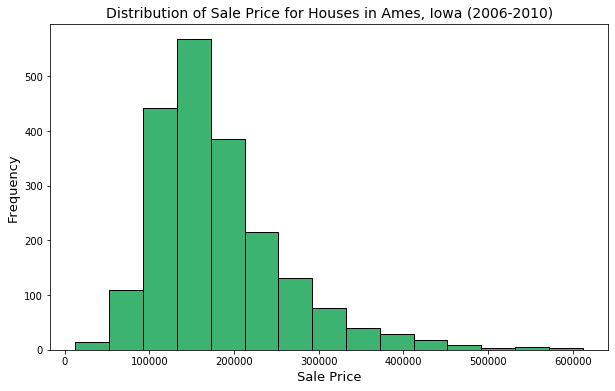

In [129]:
create_hist(housing['SalePrice'], 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)',
           x_label = 'Sale Price',
           y_label = 'Frequency')

The distribution for the target is not normally distributed. It has a right skew.

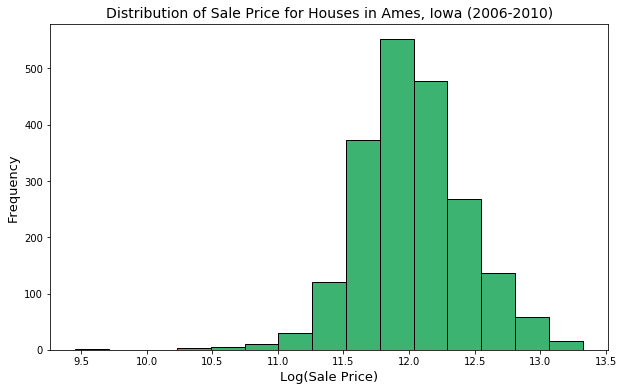

In [130]:
create_hist(np.log(housing['SalePrice']), 
            num_bins = 15, 
            title = 'Distribution of Sale Price for Houses in Ames, Iowa (2006-2010)',
           x_label = 'Log(Sale Price)',
           y_label = 'Frequency')

Logging the distribution helps normalize the data a little, but now there is a slight left skew.

#### Features

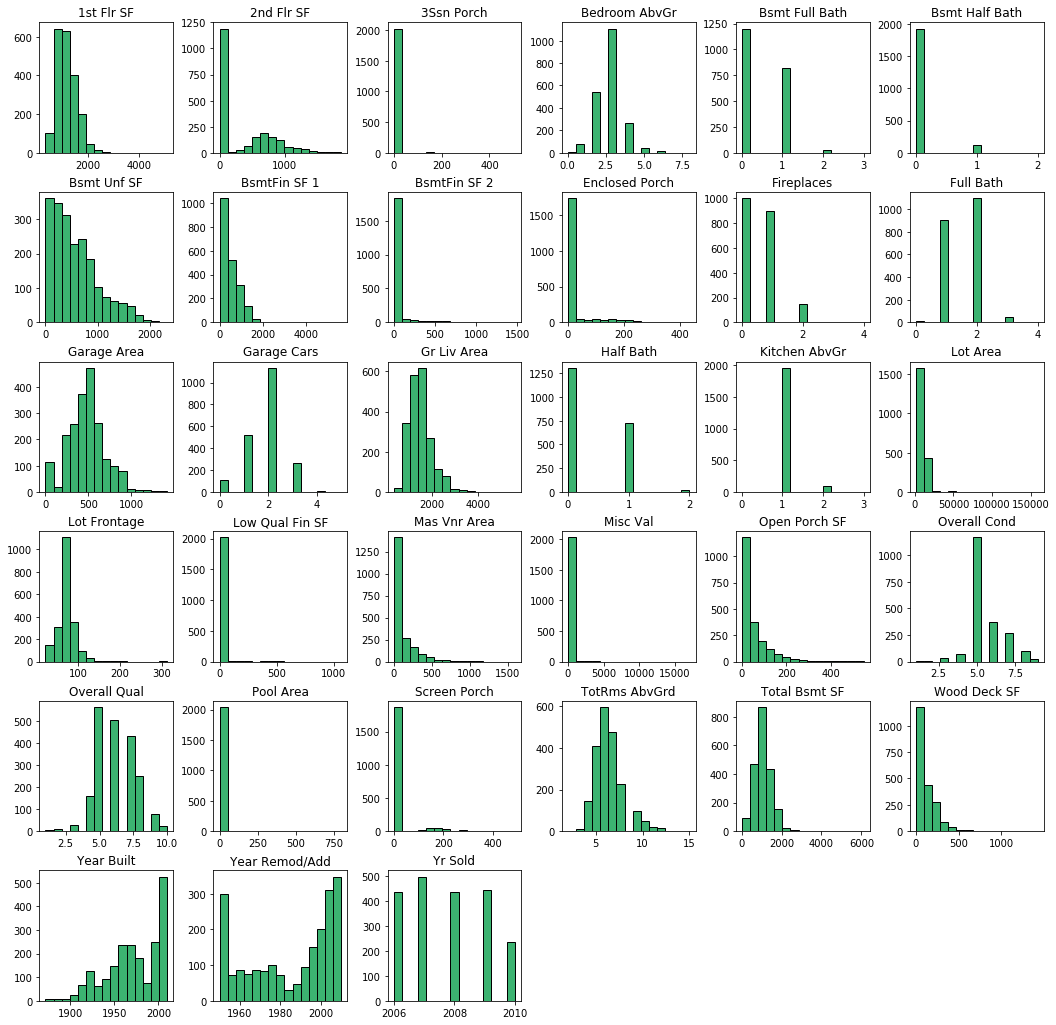

In [131]:
housing.drop(columns='SalePrice').hist(figsize=(18,18), bins = 15, edgecolor = 'black', grid = False, color = 'mediumseagreen')
plt.title('Distributions of Features');

The distributions for the majority of numeric features do not appear to be normally distributed. Only 'Total Bsmt SF' appears to have a norrrmal distribution.

### Visualizing Relationships between Categorical Features and Sales Price

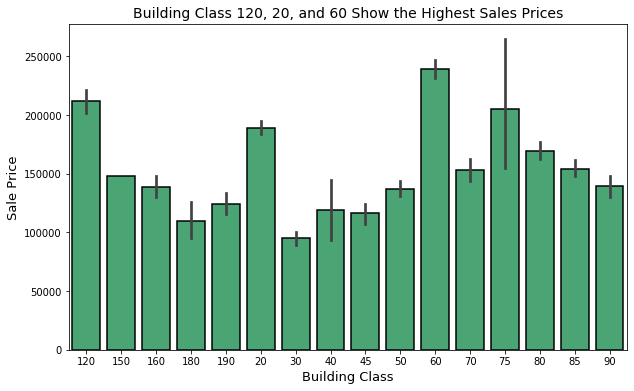

In [133]:
create_bar(housing, 
                  'MS SubClass', 
                  'SalePrice', 
                  title='Building Class 120, 20, and 60 Show the Highest Sales Prices', 
                  x_label = 'Building Class', 
                  y_label = 'Sale Price'
          )


In the above graph, we can see that Building Classes 120 (1-Story Planned Development Unit), 20 (1-Story 1946 and newer), and 60 (2-Story 1946 & Newer) result in significantly increased sales prices. These building classes might be important features for predicting the price of a building in Ames, Iowa.

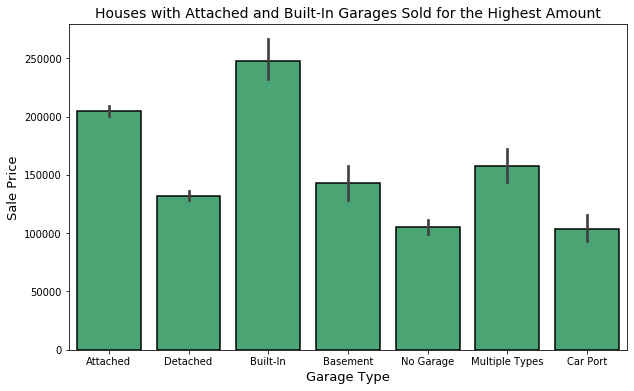

In [134]:
create_bar_xticks(housing, 'Garage Type', 'SalePrice', title='Houses with Attached and Built-In Garages Sold for the Highest Amount', x_label = 'Garage Type', y_label = 'Sale Price', x_tick_labels =['Attached', 'Detached', 'Built-In', 'Basement', 'No Garage', 'Multiple Types', 'Car Port'])


Houses with built-in garages had the highest sales prices. Built-in garages also have living space above them, so in addition to adding value through a garage, they can also add value through more liveable space.

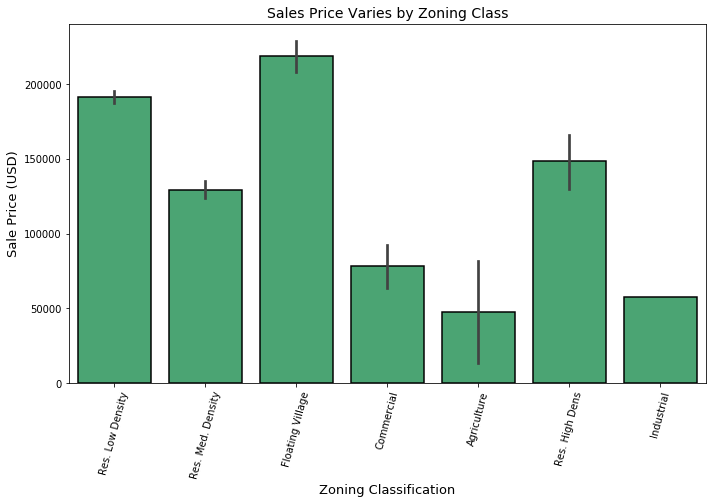

In [135]:
create_bar_xticks(housing, 
           'MS Zoning', 
           'SalePrice', 
            title='Sales Price Varies by Zoning Class', 
            x_label = 'Zoning Classification',
            y_label = 'Sale Price (USD)',
            x_tick_labels = ['Res. Low Density', 'Res. Med. Density', 'Floating Village', 'Commercial', 'Agriculture', 'Res. High Dens', 'Industrial'])
plt.tight_layout()
plt.xticks(rotation = 75);


From this figure, we can see that Zoning Classification appears to result in vastly different sales prices.

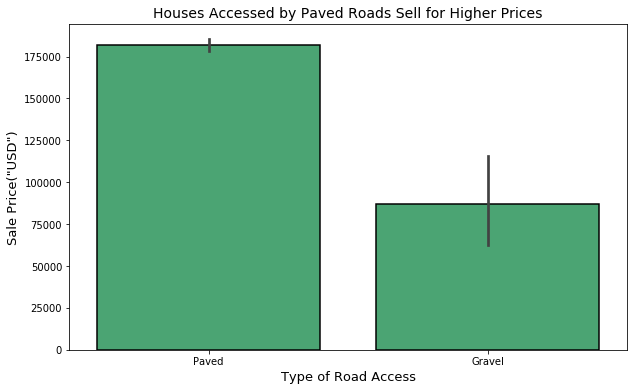

In [136]:
create_bar_xticks(housing, 
           'Street', 
           'SalePrice', 
            title='Houses Accessed by Paved Roads Sell for Higher Prices', 
            x_label = 'Type of Road Access',
            y_label = 'Sale Price("USD")',
            x_tick_labels = ['Paved', 'Gravel'])

From this figure, it appears that having access to the property via a paved road results in the house selling for a higher price than accessing the property via a gravel road.

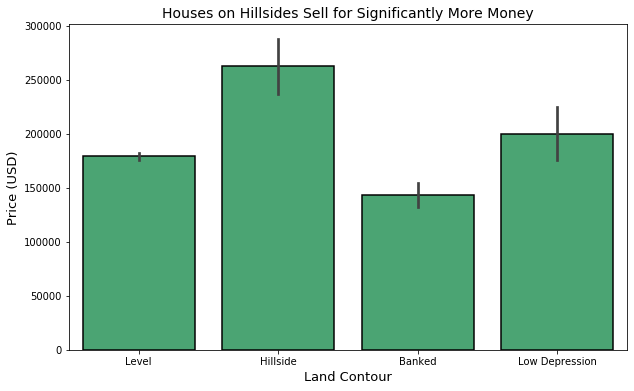

In [137]:
create_bar_xticks(housing, 
           'Land Contour', 
           'SalePrice', 
            title='Houses on Hillsides Sell for Significantly More Money', 
            x_label = 'Land Contour',
            y_label = 'Price (USD)',
            x_tick_labels = ['Level', 'Hillside', 'Banked', 'Low Depression'])

From the above figure, we can see that houses on the hillside sell for the most money, while houses that are banked (steep rise from the street to the building) sell or the least amount of money. 

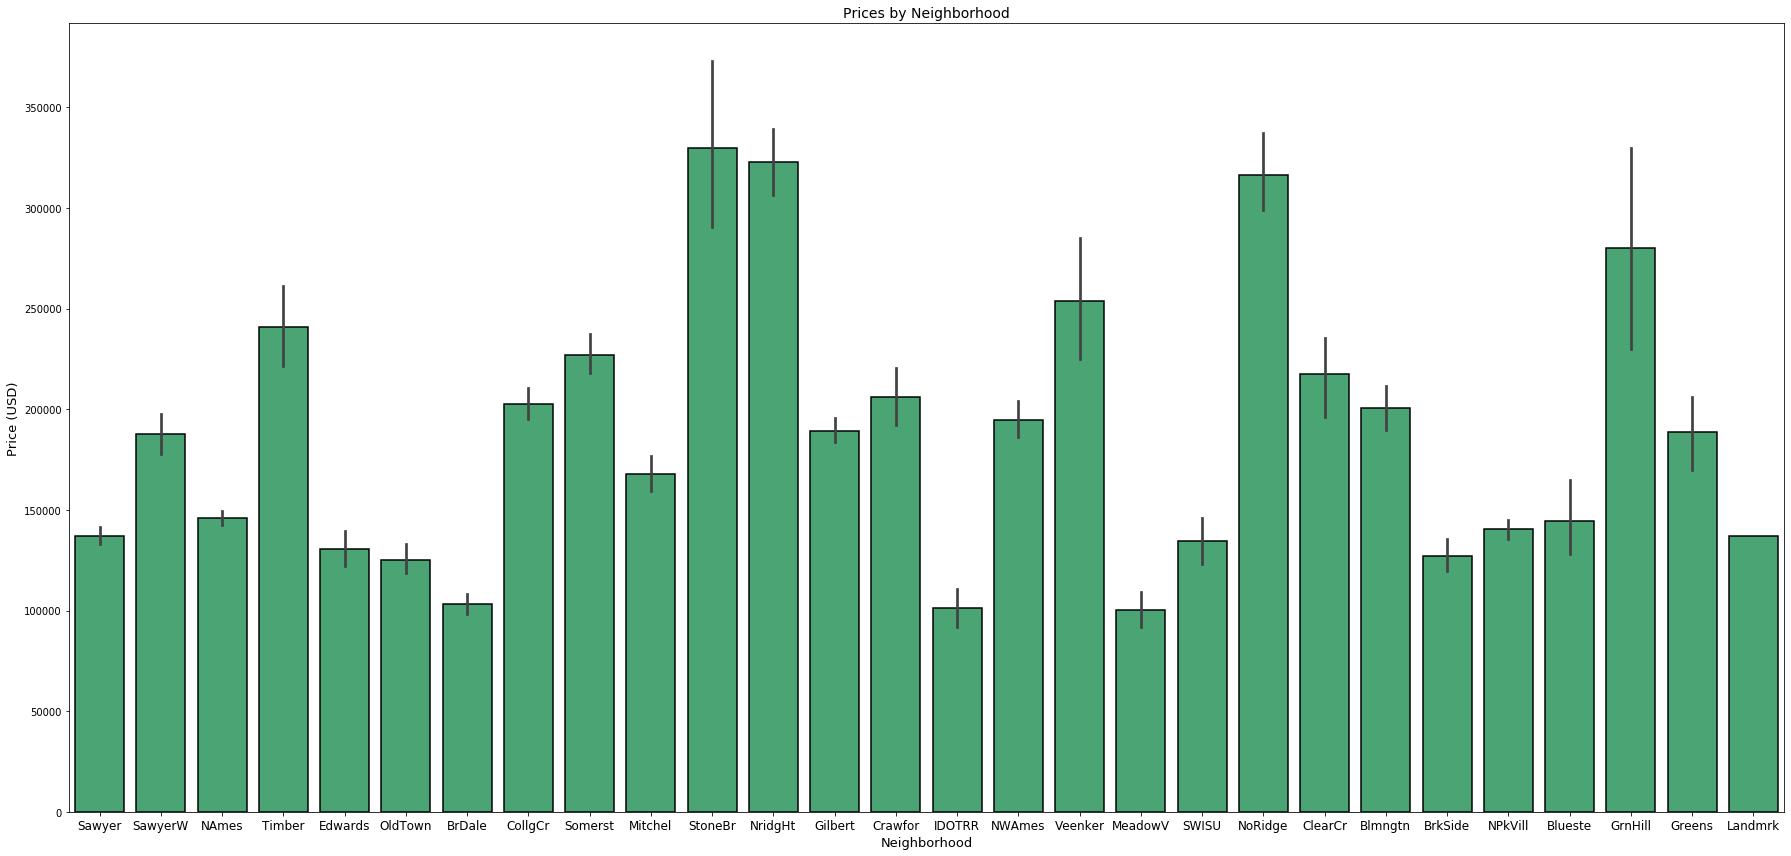

In [138]:
create_bar(housing, 
           'Neighborhood', 
           'SalePrice', 
            title='Prices by Neighborhood', 
            x_label = 'Neighborhood',
            y_label = 'Price (USD)',
          plot_size = (25,12))
plt.xticks(size=12)
plt.tight_layout();

Neighborhood definitely seems to impact the price of a property. However, created dummy variable for each neighborhood will introduce too many features into our model. Because we seem to see three ranges of peaks in this figure, I will later engineer three features to capture this variation.

Group 1 - Stone Brook, Northridge Heights, Veenker, Northridge, Green Hill
Group 2 - Sawyer West, Timber, College Creek, Somerset, Gilbert, Crawford, Northwest Ames, Cleark Creek, Bloomington, Greens
Group 3 - All Others

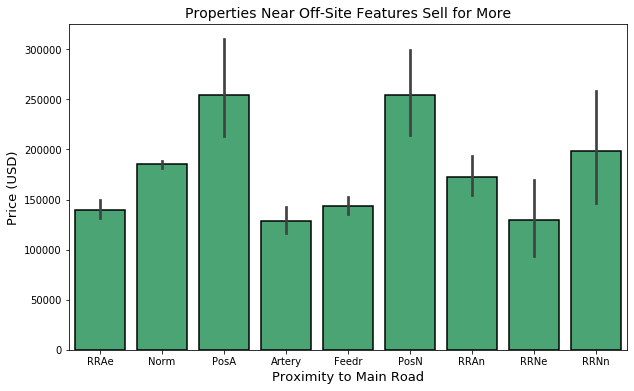

In [139]:
create_bar(housing, 
           'Condition 1', 
           'SalePrice', 
            title='Properties Near Off-Site Features Sell for More', 
            x_label = 'Proximity to Main Road',
            y_label = 'Price (USD)'
            )

From this graph, we are able to see that Sale Prices increase if the property is near a positive off-site feature. Likewise, prices are less if the property is near an arterial or feeder street. 

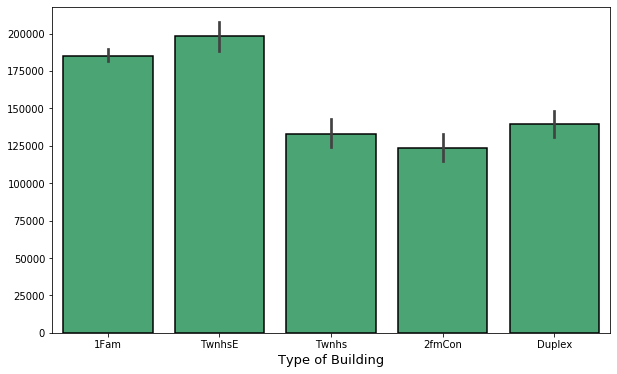

In [140]:
create_bar(housing, 
           'Bldg Type', 
           'SalePrice', 
            title='', 
            x_label = 'Type of Building',
            y_label = '')

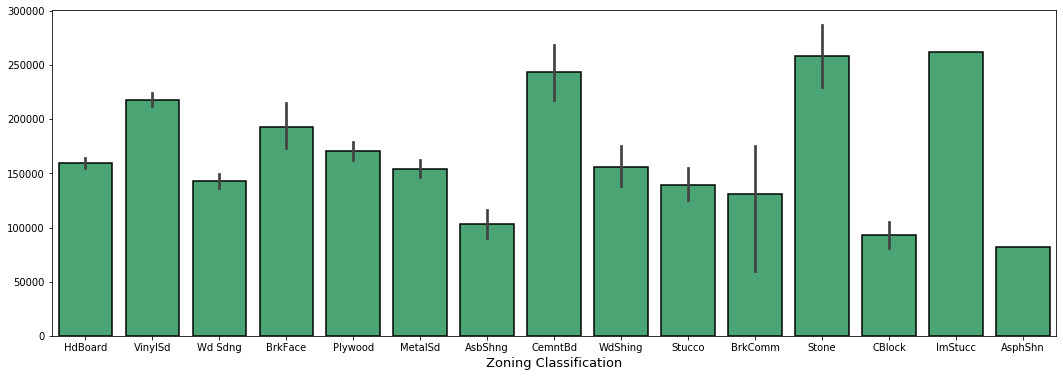

In [141]:
create_bar(housing, 
           'Exterior 1st', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '',
          plot_size=(18,6))

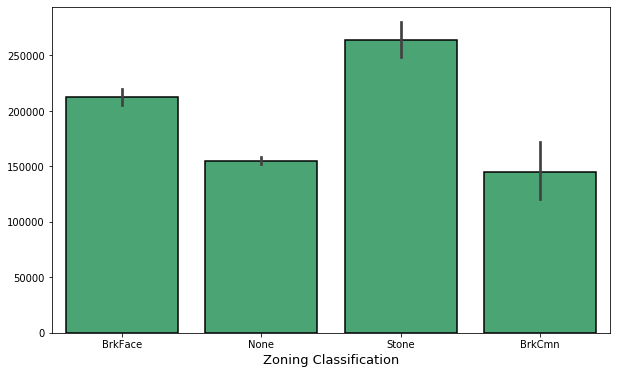

In [142]:
create_bar(housing, 
           'Mas Vnr Type', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

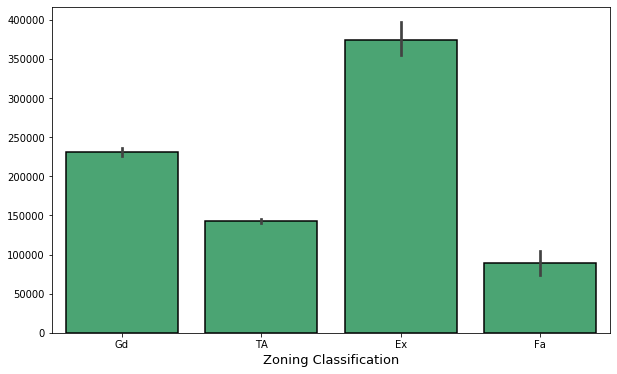

In [143]:
create_bar(housing, 
           'Exter Qual', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

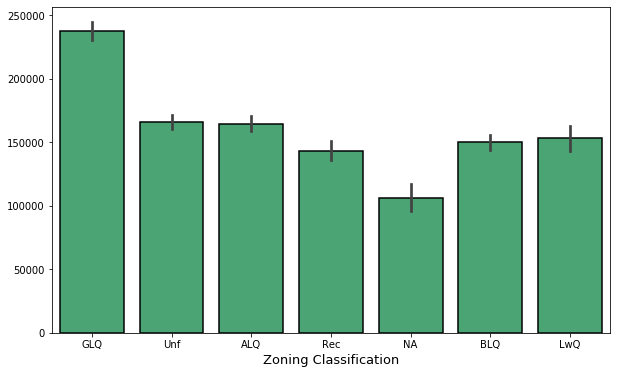

In [144]:
create_bar(housing, 
           'BsmtFin Type 1', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

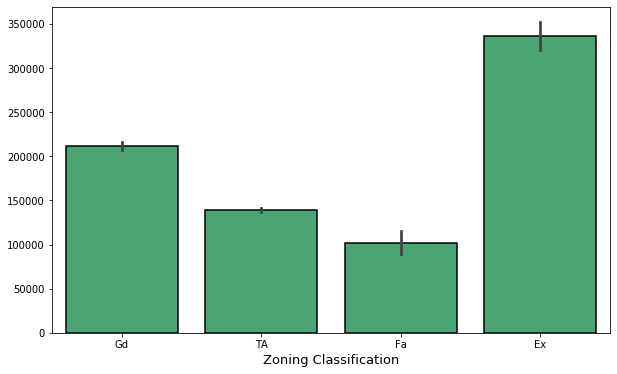

In [145]:
create_bar(housing, 
           'Kitchen Qual', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

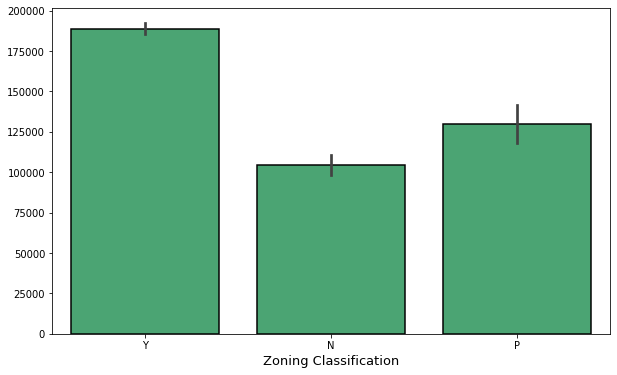

In [146]:
create_bar(housing, 
           'Paved Drive', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

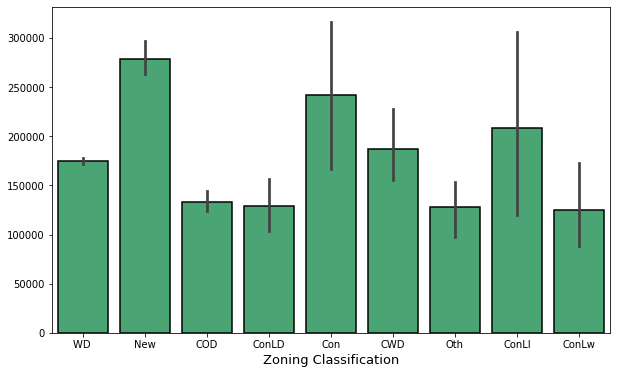

In [147]:
create_bar(housing, 
           'Sale Type', 
           'SalePrice', 
            title='', 
            x_label = 'Zoning Classification',
            y_label = '')

## Feature Engineering

### Combine Train + Test Datasets to Ensure Equal Features in Train/Test Datasets

In [148]:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

train_index_marker = len(housing)

train_and_test = pd.concat(objs=[housing, test], axis = 0)
train_and_test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,March,2010,WD,130500.0
1,544,531379050,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,April,2009,WD,220000.0
2,153,535304180,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,January,2010,WD,109000.0


### Functions

In [149]:
def create_total_baths(df):
    df['total_baths'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5 * (df['Bsmt Half Bath'] + df['Half Bath'])

In [150]:
def drop_baths_columns(df):
    '''
    Drops columns used to create "Total Baths" feature
    '''
    df.drop(columns = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Full Bath'], inplace = True)

In [151]:
def create_liveable_sf(df):
    df['liveable_sf'] = df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Gr Liv Area']

In [152]:
def drop_liveable_sf_columns(df):
    '''
    Drops all columns directly related to "Liveable SF" feature
    '''
    df.drop(columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Gr Liv Area', '1st Flr SF', '2nd Flr SF'], inplace = True)

In [153]:
#def create_custom_dummy(df, column, )

### Create Features

#### Create a feature for total number of baths per home

In [154]:
create_total_baths(train_and_test)

In [155]:
drop_baths_columns(train_and_test)

#### Create a feature for total livable sq feet in the house

In [156]:
create_liveable_sf(train_and_test)

In [157]:
drop_liveable_sf_columns(train_and_test)

#### Explore if a 'Garage' Feature Can Be Built

In [158]:
train_and_test.columns[train_and_test.columns.str.contains('Garage')]

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [159]:
# Correlation of Garage Area with Sale Price (Training Data Only)
housing.corr()['Garage Area']['SalePrice']

0.649896849661898

In [160]:
# Correlation of Garage Cars with Sale Price (Training Data Only)
housing.corr()['Garage Cars']['SalePrice']

0.6477813459587413

In [161]:
# Correlation between Garage Area and Garage Cars
housing.corr()['Garage Area']['Garage Cars']

0.8934415694476694

Because the area of the garage and the number of cars that a garage can fit are highly correlated, I will create an interaction feature to account for this relationship.

In [162]:
housing['garage_area_car_int'] = housing['Garage Area'] * housing['Garage Cars']

In [163]:
housing.corr()['garage_area_car_int']['SalePrice']

0.6905958429669726

Because the interaction feature is more highly correlated than either of the other features, we will also add this feature to our full dataset. 

In [164]:
train_and_test['garage_area_car_int'] = train_and_test['Garage Area'] * train_and_test['Garage Cars']

#### Create Two Neighborhood Features Based on Clusters from Bar Plot

In the bar plot of Average Sale Price by Neighborhood, I noticed about three clusters of neighborhoods with sales prices that were in a similar range. To eliminate adding a dummy variable for each individual neighborhood, I will create two dummy variables to encode inclusion in these clusters. 

In [167]:
group1 = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
group2 = ['SawyerW', 'CollgCr', 'Somerst', 'Gilbert', 'Crawfor', 'NAmes', 'ClearCr', 'Blmngtn', 'Greens']

train_and_test['neighborhoods_1'] = train_and_test['Neighborhood'].map(lambda name: 1 if name in group1 else 0)
train_and_test['neighborhoods_2'] = train_and_test['Neighborhood'].map(lambda name: 1 if name in group2 else 0)

#### Create Three Building Class Features

In [168]:
train_and_test['SubClass20'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 20 else 0)
train_and_test['SubClass60'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 60 else 0)
train_and_test['SubClass120'] = train_and_test['MS SubClass'].map(lambda subclass: 1 if subclass == 120 else 0)

#### Create a feature to represent if a property is close to an off-site feature or an arterial or feeder street

In [169]:
train_and_test['close_to_offsite_feature'] = train_and_test['Condition 1'].map(lambda x: 1 if x in ['PosN', 'PosA'] else 0)

In [225]:
train_and_test['close_to_busy_street'] = train_and_test['Condition 1'].map(lambda x: 1 if x in ['Artery', 'Feedr'] else 0)

#### Create a feature to determine if masonry veneer type is stone

In [170]:
train_and_test['stone_veneer'] = train_and_test['Mas Vnr Type'].map(lambda x: 1 if x == 'Stone' else 0)

#### Create a feature to code if the type of sale is for a new home

In [171]:
train_and_test['new_sale'] = train_and_test['Sale Type'].map(lambda x: 1 if x == 'New' else 0)

#### Create a feature to denote good living quarters in the basement

In [172]:
train_and_test['good_basement'] = train_and_test['BsmtFin Type 1'].map(lambda x: 1 if x == 'GLQ' else 0)

#### Create a feature to denote excellent kitchen quality

In [173]:
train_and_test['excellent_kitchen'] = train_and_test['Kitchen Qual'].map(lambda x: 1 if x == 'Ex' else 0)

#### Create dummy variables for categorical features of interest identified in EDA

In [226]:
dummify_list = ['Street', 'Land Contour', 'Bldg Type', 'Garage Type', 'Exter Qual', 'Paved Drive']

In [227]:
train_and_test = pd.get_dummies(data = train_and_test, columns = dummify_list, drop_first = True)

KeyError: "None of [Index(['Street', 'Land Contour', 'Bldg Type', 'Garage Type', 'Exter Qual',\n       'Paved Drive'],\n      dtype='object')] are in the [columns]"

### Divide Data Back into Preprocessed Train and Test Sets

#### Training Data

In [228]:
# Split into Train
train_preprocessed = train_and_test[:train_index_marker]

In [229]:
# Check Shape
train_preprocessed.shape

(2051, 99)

In [230]:
# Check for Null Values
train_preprocessed['SalePrice'].isna().sum()

0

#### Testing Data

In [231]:
# Split into Test
test_preprocessed = train_and_test[train_index_marker:]

In [232]:
# Check Shape
test_preprocessed.shape

(878, 99)

In [233]:
# Check that all 'SalePrice' values are NA
test_preprocessed['SalePrice'].isna().sum()

878

## Model Preparation

### Model 1: Linear Regression with Handpicked Features

In [234]:
cols_to_drop = ['Id', 'PID', 'MS SubClass','MS Zoning', 'Lot Frontage', 'Lot Area', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'House Style', 'Overall Cond', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'SalePrice', 'Alley', 'Lot Shape', 'Sale Type','Foundation']

X = train_preprocessed.drop(columns = cols_to_drop)
y = train_preprocessed['SalePrice']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [236]:
X_holdout = test_preprocessed.drop(columns = cols_to_drop)

In [237]:
X_holdout.shape

(878, 41)

## Modeling

### Baseline/ Null Model

In [238]:
dr = DummyRegressor()

In [239]:
dr.fit(X_train, y_train);

In [240]:
cross_val_score(dr, X_train, y_train).mean()

-0.0018284034489776334

In [241]:
dr.score(X_train, y_train)

0.0

In [242]:
dr.score(X_test, y_test)

-0.00025950239237215733

### Model 1: Linear Regression with Hand-Selected Features

In [243]:
X_train.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Garage Cars', 'Garage Area', 'Yr Sold', 'total_baths',
       'liveable_sf', 'garage_area_car_int', 'neighborhoods_1',
       'neighborhoods_2', 'SubClass20', 'SubClass60', 'SubClass120',
       'close_to_offsite_feature', 'stone_veneer', 'new_sale', 'good_basement',
       'excellent_kitchen', 'Street_Pave', 'Land Contour_HLS',
       'Land Contour_Low', 'Land Contour_Lvl', 'Bldg Type_2fmCon',
       'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
       'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn',
       'Garage Type_CarPort', 'Garage Type_Detchd', 'Garage Type_NA',
       'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Paved Drive_P',
       'Paved Drive_Y', 'close_to_busy_street'],
      dtype='object')

In [244]:
lr1 = LinearRegression()

In [245]:
lr1.fit(X_train, y_train);

In [246]:
cross_val_score(lr1, X_train, y_train).mean()

0.8336412115885963

In [247]:
lr1.score(X_train, y_train)

0.8577305343734725

In [248]:
lr1.score(X_test, y_test)

0.8636311746737677

In [249]:
preds = lr1.predict(X_holdout)

In [250]:
preds_cols = pd.Series(preds, name = 'SalePrice')
id_col = test_preprocessed['Id']
output = pd.concat([id_col, preds_cols], axis = 1)
output.sort_values('Id', inplace = True)

In [251]:
output.set_index('Id', inplace = True)

In [252]:
output.head()

,SalePrice
Id,
2,96864.903305
4,262239.318138
6,187812.215062
7,239384.693441
17,211391.572621


In [215]:
test_preprocessed.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,Low Qual Fin SF,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_baths,liveable_sf,garage_area_car_int,neighborhoods_1,neighborhoods_2,SubClass20,SubClass60,SubClass120,close_to_offsite_feature,stone_veneer,new_sale,good_basement,excellent_kitchen,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Paved Drive_P,Paved Drive_Y
0,2658,902301120,190,RM,69.000000,9142,Grvl,Reg,AllPub,Inside,Gtl,OldTown,Norm,Norm,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,Stone,Fa,TA,No,Unf,Unf,1020.0,1020.0,GasA,Gd,N,FuseP,0,4,2,Fa,9,Typ,0,NA,1910,Unf,1.0,440.0,Po,Po,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,NaN,2.0,1928.0,440.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,2718,905108090,90,RL,69.545961,9662,NA,IR1,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,CBlock,Gd,TA,No,Unf,Unf,1967.0,1967.0,GasA,TA,Y,SBrkr,0,6,2,TA,10,Typ,0,NA,1977,Fin,2.0,580.0,TA,TA,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,NaN,2.0,1967.0,1160.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
2,2414,528218130,60,RL,58.000000,17104,NA,IR1,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,Gd,Av,GLQ,Unf,100.0,654.0,GasA,Ex,Y,SBrkr,0,3,1,Gd,7,Typ,1,Gd,2006,RFn,2.0,426.0,TA,TA,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,NaN,3.5,2050.0,852.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1989,902207150,30,RM,60.000000,8520,NA,Reg,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,CBlock,TA,TA,No,Unf,Unf,968.0,968.0,GasA,TA,Y,SBrkr,0,2,1,TA,5,Typ,0,NA,1935,Unf,2.0,480.0,Fa,TA,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,NaN,1.0,968.0,960.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,625,535105100,20,RL,69.545961,9500,NA,IR1,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,CBlock,Gd,TA,No,BLQ,Unf,785.0,1394.0,GasA,Gd,Y,SBrkr,0,3,1,TA,6,Typ,2,Gd,1963,RFn,2.0,514.0,TA,TA,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,NaN,2.5,2003.0,1028.0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [216]:
output.to_csv('lutes_submission1')

In [204]:
### Lasso

In [205]:
#https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [206]:
lasso = Lasso(alpha = 800)

In [207]:
lasso.fit(X_train, y_train)

Lasso(alpha=800, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [208]:
lasso_training_score = lasso.score(X_train, y_train)
lasso_testing_score = lasso.score(X_test, y_test)
num_features = np.sum(lasso.coef_ != 0)

In [209]:
print(f'The training score for the Lasso Regression is {lasso_training_score}.')
print(f'The testing score for the Lasso Regression is {lasso_testing_score}.')
print(f'The number of features in the model is {num_features}.')

The training score for the Lasso Regression is 0.8273988485123406.
The testing score for the Lasso Regression is 0.858662217814337.
The number of features in the model is 15.


In [210]:
# Code from Jose Portilla's Data Science Class on Udemy
lasso_coef = pd.DataFrame(lasso.coef_, X.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [211]:
#lasso_coef[lasso_coef['Coefficient'] != 0]